In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
uber_data = pd.read_csv('Uber Request Data.csv')
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [8]:
uber_data.nunique()

Request id           6745
Pickup point            2
Driver id             300
Status                  3
Request timestamp    5618
Drop timestamp       2598
dtype: int64

In [9]:
uber_data.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [14]:
uber_data.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [23]:
uber_data.shape

(6745, 6)

In [25]:
uber_data.shape[0]

6745

In [26]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [35]:
print(uber_data['Request timestamp'].dtypes)

object


In [58]:
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [64]:
uber_data["Request timestamp"] = uber_data["Request timestamp"].str.replace("/","-")
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11-7-2016 6:46,11/7/2016 7:25


In [65]:
print(uber_data["Request timestamp"].dtypes)

object


In [73]:
uber_data_rt = pd.to_datetime(uber_data["Request timestamp"])
uber_data_rt

0      2016-11-07 11:51:00
1      2016-11-07 17:57:00
2      2016-12-07 09:17:00
3      2016-12-07 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [83]:
uber_data["Request timestamp"] = pd.to_datetime(uber_data["Request timestamp"],dayfirst=True)
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN


In [84]:
uber_data.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp               object
dtype: object

In [86]:
uber_data["Drop timestamp"] = uber_data["Drop timestamp"].str.replace("/","-")
uber_data["Drop timestamp"] = pd.to_datetime(uber_data["Drop timestamp"],dayfirst=True)
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [87]:
uber_data.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT


In [90]:
uber_data["R_hr"] = uber_data["Request timestamp"].dt.hour
uber_data["R_day"] = uber_data["Request timestamp"].dt.day
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [119]:
uber_data.groupby(by=['R_hr','Status'])['Status'].count()

R_hr  Status           
0     Cancelled              3
      No Cars Available     56
      Trip Completed        40
1     Cancelled              4
      No Cars Available     56
                          ... 
22    No Cars Available    138
      Trip Completed       154
23    Cancelled             10
      No Cars Available     81
      Trip Completed       103
Name: Status, Length: 72, dtype: int64

<AxesSubplot:xlabel='R_hr', ylabel='count'>

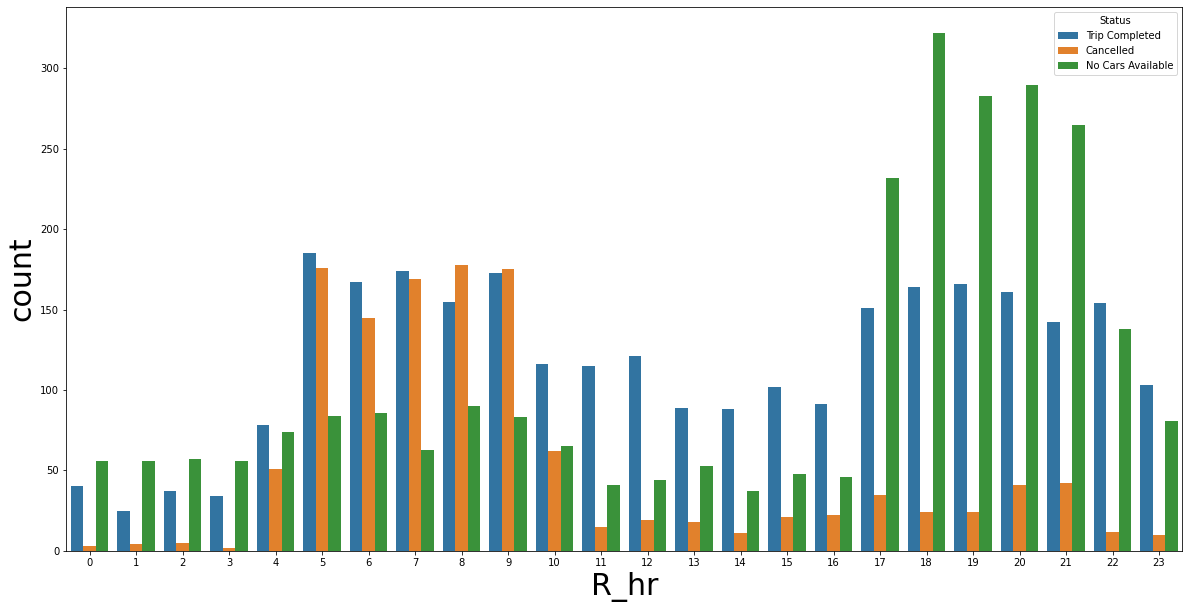

In [106]:
plt.figure(figsize=(20,10))
plt.xlabel('xlabel',fontsize=30)
plt.ylabel('ylabel',fontsize=30)
sns.countplot(x="R_hr", data=uber_data,  hue="Status",)

In [120]:
uber_data.groupby(by=['R_day','Status'])['Status'].count()

R_day  Status           
11     Cancelled            262
       No Cars Available    504
       Trip Completed       601
12     Cancelled            240
       No Cars Available    505
       Trip Completed       562
13     Cancelled            270
       No Cars Available    490
       Trip Completed       577
14     Cancelled            252
       No Cars Available    571
       Trip Completed       530
15     Cancelled            240
       No Cars Available    580
       Trip Completed       561
Name: Status, dtype: int64

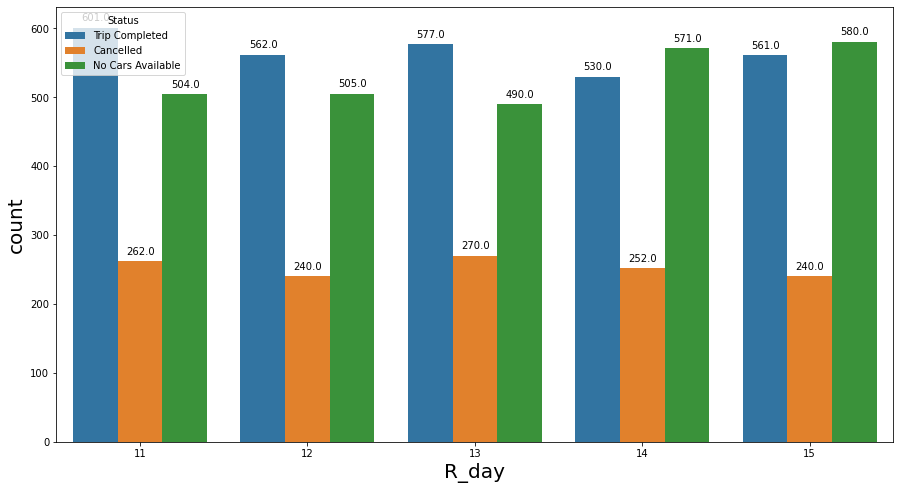

In [149]:
plt.figure(figsize=(15,8))
plt.xlabel('xlabel',fontsize=20)
plt.ylabel('ylabel',fontsize=20)
r_day_count = sns.countplot(x="R_day", data=uber_data,  hue="Status",)
for p in r_day_count.patches:
        r_day_count.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+10))

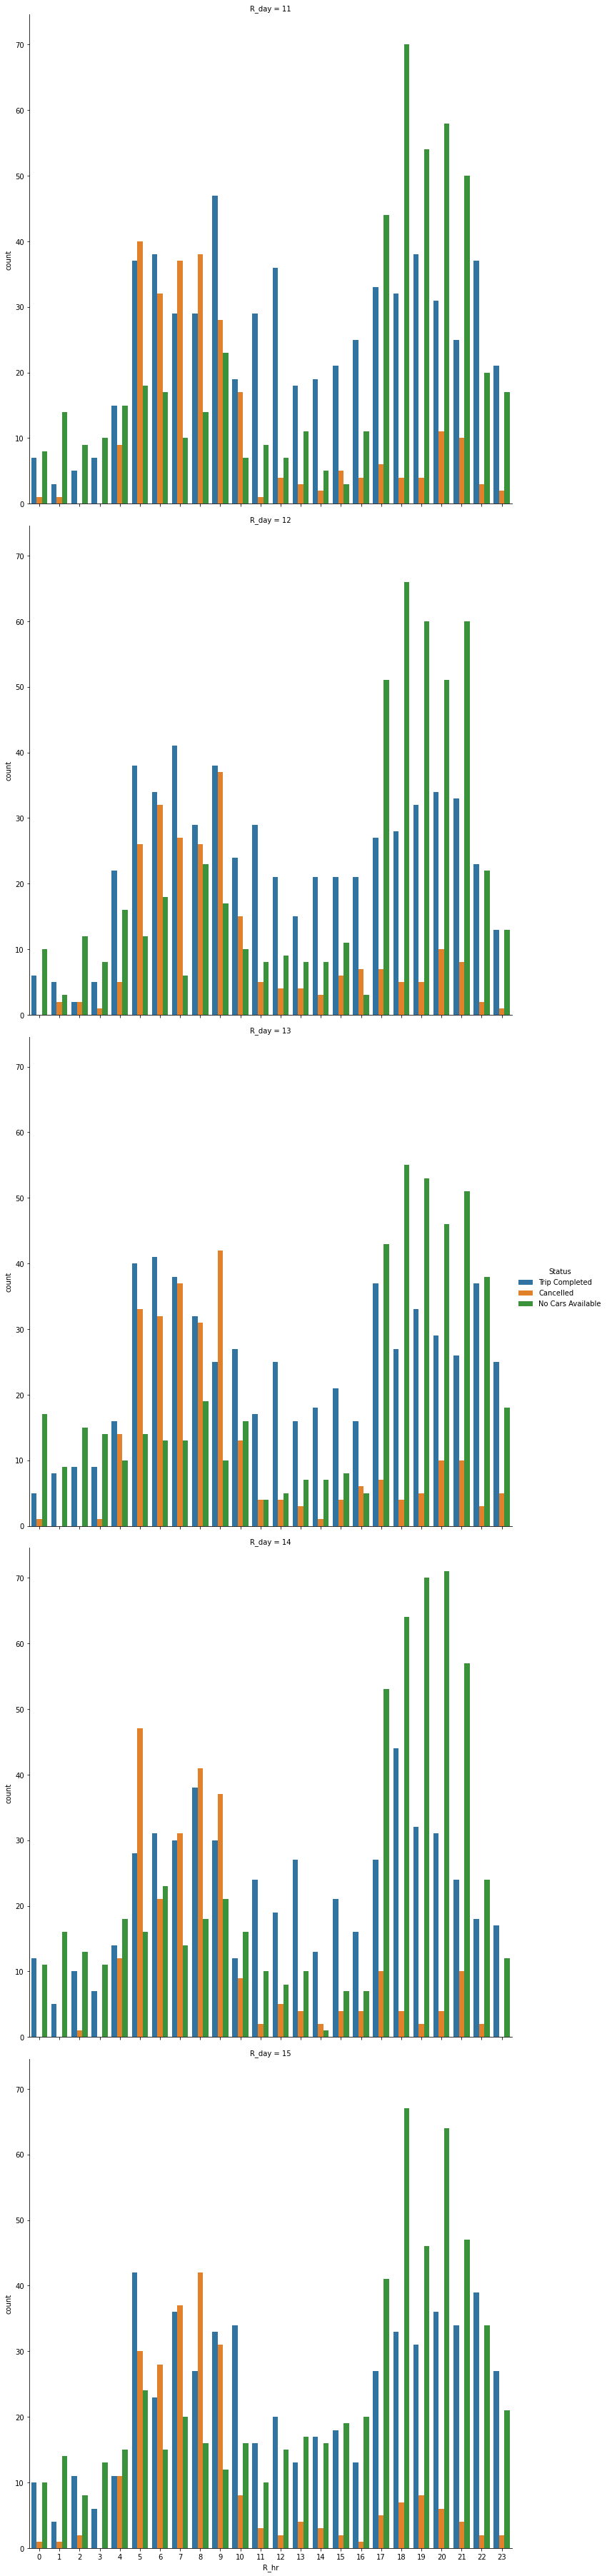

In [297]:
sns.catplot(x="R_hr",row="R_day",hue="Status",data=uber_data,kind="count",height=10)

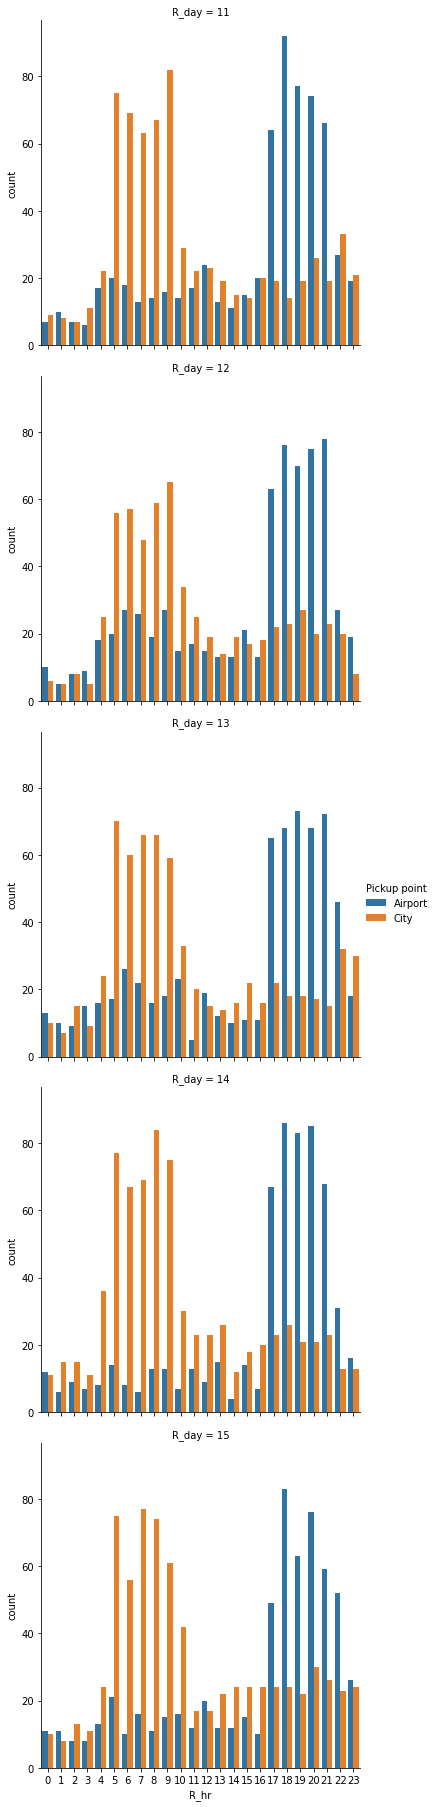

In [288]:
sns.catplot(x="R_hr",row="R_day",hue="Pickup point",data=uber_data,kind="count",)

In [172]:
uber_data["Time Slot"] = 0
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [173]:
uber_data["Time Slot"][0]

0

In [180]:
j=0
for i in uber_data["R_hr"]:
    if i<5:
        uber_data["Time Slot"][j]="Pre_Morning"
    elif 5<=i<10:
        uber_data["Time Slot"][j]="Morning_Rush"        
    elif 10<=i<17:
        uber_data["Time Slot"][j]="Day_Time"        
    elif 17<=i<22:
        uber_data["Time Slot"][j]="Evening_Rush"
    else:
        uber_data["Time Slot"][j]="Late_Night"
    j=j+1

<ipython-input-180-b394c8d04e72>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data["Time Slot"][j]="Day_Time"
<ipython-input-180-b394c8d04e72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data["Time Slot"][j]="Evening_Rush"
<ipython-input-180-b394c8d04e72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data["Time Slot"][j]="Morning_Rush"
<ipython-input-180-b394c8d04e72>:4: SettingWithCopyWarning: 
A value is t

In [184]:
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,R_hr,R_day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [183]:
uber_data["Time Slot"][10]

'Morning_Rush'

In [185]:
uber_data["Time Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time Slot, dtype: int64

<AxesSubplot:xlabel='Time Slot', ylabel='count'>

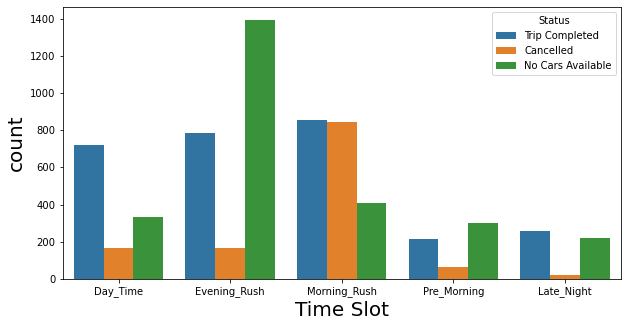

In [188]:
plt.figure(figsize=(10,5))
plt.xlabel('xlabel',fontsize=20)
plt.ylabel('ylabel',fontsize=20)
sns.countplot(x="Time Slot",data=uber_data,hue="Status")

In [219]:
uber_data_morning_rush=uber_data[uber_data['Time Slot']=='Morning_Rush']
uber_data_morning_rush['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [251]:
uber_data_evening_rush=uber_data[uber_data['Time Slot']=='Evening_Rush']

In [252]:
uber_data_day_time_rush=uber_data[uber_data['Time Slot']=='Day_Time']

In [253]:
uber_data_pre_morning_rush=uber_data[uber_data['Time Slot']=='Pre_Morning']

In [254]:
uber_data_late_night_rush=uber_data[uber_data['Time Slot']=='Late_Night']

## Severity of problem by location in morning rush

In [237]:
uber_data_morning_rush.groupby(by=['Status'])['Pickup point'].value_counts()

Status             Pickup point
Cancelled          City            820
                   Airport          23
No Cars Available  City            385
                   Airport          21
Trip Completed     City            472
                   Airport         382
Name: Pickup point, dtype: int64

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

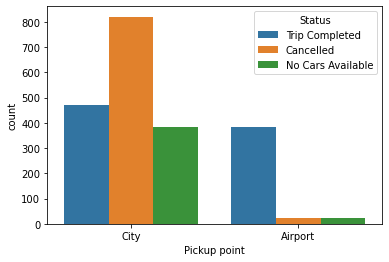

In [229]:
sns.countplot(x='Pickup point',hue='Status',data=uber_data_morning_rush,)

In [223]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'Airport')].shape[0]

426

In [205]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'Airport') & (uber_data_morning_rush['Status'] == 'Trip Completed')].shape[0]

382

In [210]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'Airport') & (uber_data_morning_rush['Status'] == 'Cancelled')].shape[0]

23

In [211]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'Airport') & (uber_data_morning_rush['Status'] == 'No Cars Available')].shape[0]

21

In [213]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'City')].shape[0]

1677

In [214]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'City') & (uber_data_morning_rush['Status'] == 'Trip Completed')].shape[0]

472

In [215]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'City') & (uber_data_morning_rush['Status'] == 'Cancelled')].shape[0]

820

In [216]:
uber_data_morning_rush.loc[(uber_data_morning_rush['Pickup point'] == 'City') & (uber_data_morning_rush['Status'] == 'No Cars Available')].shape[0]

385

## Severity of problem by location in Evening rush

In [235]:
uber_data_evening_rush=uber_data[uber_data['Time Slot']=='Evening_Rush']
uber_data_evening_rush['Status'].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [238]:
uber_data_evening_rush.groupby(by=['Status'])['Pickup point'].value_counts()

Status             Pickup point
Cancelled          Airport          106
                   City              60
No Cars Available  Airport         1321
                   City              71
Trip Completed     City             411
                   Airport          373
Name: Pickup point, dtype: int64

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

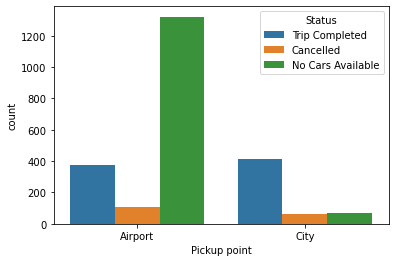

In [230]:
sns.countplot(x='Pickup point',hue='Status',data=uber_data_evening_rush)

In [220]:
uber_data_evening_rush.shape[0]

2342

In [224]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'Airport')].shape[0]

1800

In [225]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'Airport') & (uber_data_evening_rush['Status'] == 'Trip Completed')].shape[0]

373

In [226]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'Airport') & (uber_data_evening_rush['Status'] == 'Cancelled')].shape[0]

106

In [227]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'Airport') & (uber_data_evening_rush['Status'] == 'No Cars Available')].shape[0]

1321

In [231]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'City')].shape[0]

542

In [232]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'City') & (uber_data_evening_rush['Status'] == 'Trip Completed')].shape[0]

411

In [233]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'City') & (uber_data_evening_rush['Status'] == 'Cancelled')].shape[0]

60

In [234]:
uber_data_evening_rush.loc[(uber_data_evening_rush['Pickup point'] == 'City') & (uber_data_evening_rush['Status'] == 'No Cars Available')].shape[0]

71

## reason for this issue for the supply-demand gap?
#### 1. Overall cars availability is very poor at  both city and airport location
#### 2. During Pre Morning Rush cars availability is poor at  both city and airport location and number of trip cancellation is higher at city location.
#### 3. During Morning Rush Cacellation is high
#### 4. In day time trip completion is good but availabilty of cars in city location is less
#### 5. In evening Rush cars avalabilty is less but there is less effect on cencellation.
#### 6. Cars availability during late night should be increased

<AxesSubplot:title={'center':'Late Night Rush'}, xlabel='Pickup point', ylabel='count'>

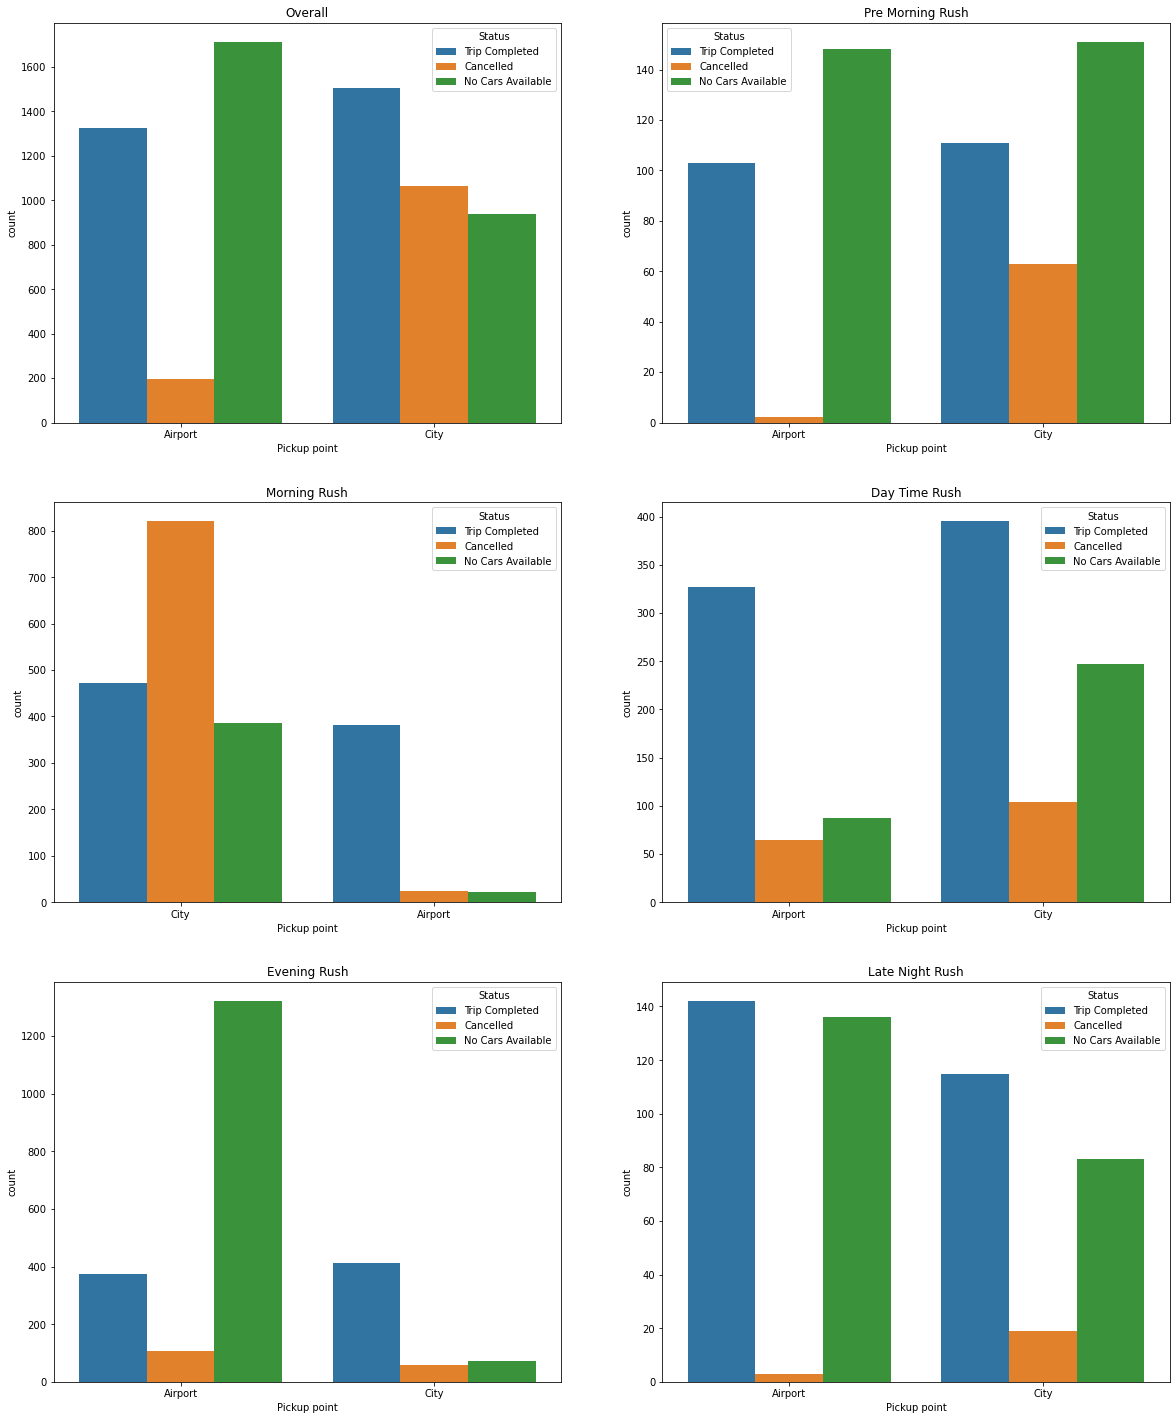

In [286]:
fig, ax = plt.subplots(3,2, figsize=(20,25))
ax[0,0].set_title("Overall")
sns.countplot(x='Pickup point',hue='Status',data=uber_data,ax=ax[0,0])
ax[0,1].set_title("Pre Morning Rush")
sns.countplot(x='Pickup point',hue='Status',data=uber_data_pre_morning_rush,ax=ax[0,1])
ax[1,0].set_title("Morning Rush")
sns.countplot(x='Pickup point',hue='Status',data=uber_data_morning_rush,ax=ax[1,0])
ax[1,1].set_title("Day Time Rush")
sns.countplot(x='Pickup point',hue='Status',data=uber_data_day_time_rush,ax=ax[1,1])
ax[2,0].set_title("Evening Rush")
sns.countplot(x='Pickup point',hue='Status',data=uber_data_evening_rush,ax=ax[2,0])
ax[2,1].set_title("Late Night Rush")
sns.countplot(x='Pickup point',hue='Status',data=uber_data_late_night_rush,ax=ax[2,1])